## Importing The Libaries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re


import warnings
warnings.filterwarnings("ignore")

import os
print(os.listdir("./Input for Vader(Raw)"))

['.DS_Store', 'UScomments-CATE-1', 'USvideos.csv', 'UScomments.csv']


In [2]:
pd.set_option('display.max_columns',None)

## Loading The Data

In [3]:
US_comments = pd.read_csv('./Input for Vader(Raw)/UScomments-CATE-1/CATE1_comments.csv', error_bad_lines=False)

In [4]:
US_videos = pd.read_csv('./Input for Vader(Raw)/UScomments-CATE-1/CATE1_videos.csv', error_bad_lines=False)

In [5]:
US_videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,cMKX2tE5Luk,The Disaster Artist | Official Trailer HD | A24,A24,1,a24|a24 films|a24 trailers|independent films|t...,1311445,34507,544,3040,https://i.ytimg.com/vi/cMKX2tE5Luk/default.jpg,13.09
1,zgLtEob6X-Q,Honest Trailers - The Mummy (2017),Screen Junkies,1,screenjunkies|screen junkies|screenjunkies new...,1056891,29943,878,4046,https://i.ytimg.com/vi/zgLtEob6X-Q/default.jpg,13.09
2,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,skit|korean|language|conversation|esl|japanese...,1582683,65749,1531,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09
3,UCrBICYM0yM,Downsizing (2017) - Official Trailer - Paramou...,Paramount Pictures,1,downsizing|preview|release date|official|drama...,2693468,7941,302,1432,https://i.ytimg.com/vi/UCrBICYM0yM/default.jpg,13.09
4,a7Sf_H2cFdM,Drowning for Power - Rooster Teeth Animated Ad...,Rooster Teeth,1,Rooster Teeth|RT|animation|television|filmmaki...,917643,25456,731,1073,https://i.ytimg.com/vi/a7Sf_H2cFdM/default.jpg,13.09


## Let's do some analysis and Data Cleaning on both the datasets.

In [6]:
US_videos.shape

(378, 11)

In [7]:
US_videos.nunique()

video_id          101
title             101
channel_title      61
category_id         1
tags               90
views             375
likes             372
dislikes          305
comment_total     334
thumbnail_link    101
date               40
dtype: int64

In [8]:
US_videos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378 entries, 0 to 377
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   video_id        378 non-null    object 
 1   title           378 non-null    object 
 2   channel_title   378 non-null    object 
 3   category_id     378 non-null    int64  
 4   tags            378 non-null    object 
 5   views           378 non-null    int64  
 6   likes           378 non-null    int64  
 7   dislikes        378 non-null    int64  
 8   comment_total   378 non-null    int64  
 9   thumbnail_link  378 non-null    object 
 10  date            378 non-null    float64
dtypes: float64(1), int64(5), object(5)
memory usage: 32.6+ KB


In [9]:
US_videos.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,cMKX2tE5Luk,The Disaster Artist | Official Trailer HD | A24,A24,1,a24|a24 films|a24 trailers|independent films|t...,1311445,34507,544,3040,https://i.ytimg.com/vi/cMKX2tE5Luk/default.jpg,13.09
1,zgLtEob6X-Q,Honest Trailers - The Mummy (2017),Screen Junkies,1,screenjunkies|screen junkies|screenjunkies new...,1056891,29943,878,4046,https://i.ytimg.com/vi/zgLtEob6X-Q/default.jpg,13.09
2,T_PuZBdT2iM,getting into a conversation in a language you ...,ProZD,1,skit|korean|language|conversation|esl|japanese...,1582683,65749,1531,3598,https://i.ytimg.com/vi/T_PuZBdT2iM/default.jpg,13.09
3,UCrBICYM0yM,Downsizing (2017) - Official Trailer - Paramou...,Paramount Pictures,1,downsizing|preview|release date|official|drama...,2693468,7941,302,1432,https://i.ytimg.com/vi/UCrBICYM0yM/default.jpg,13.09
4,a7Sf_H2cFdM,Drowning for Power - Rooster Teeth Animated Ad...,Rooster Teeth,1,Rooster Teeth|RT|animation|television|filmmaki...,917643,25456,731,1073,https://i.ytimg.com/vi/a7Sf_H2cFdM/default.jpg,13.09


In [10]:
US_comments.head()

,video_id,comment_text,likes,replies
0,cMKX2tE5Luk,I'm sure I speak for everyone when I say the w...,3,0
1,cMKX2tE5Luk,https://youtu.be/XBJtNAhVLag,0,0
2,cMKX2tE5Luk,This looks like another masterpiece!!! Bravo.....,1,0
3,cMKX2tE5Luk,check it out https://www.youtube.com/watch?v=h...,0,0
4,cMKX2tE5Luk,this looks so cool,0,0


In [11]:
US_comments.shape

(31518, 4)

In [12]:
US_comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [13]:
US_comments.dropna(inplace=True)

In [14]:
US_comments.isnull().sum()

video_id        0
comment_text    0
likes           0
replies         0
dtype: int64

In [15]:
US_comments.shape

(31518, 4)

In [16]:
US_comments.nunique()

video_id           97
comment_text    21125
likes             177
replies            61
dtype: int64

In [17]:
US_comments.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31518 entries, 0 to 31517
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   video_id      31518 non-null  object
 1   comment_text  31518 non-null  object
 2   likes         31518 non-null  int64 
 3   replies       31518 non-null  int64 
dtypes: int64(2), object(2)
memory usage: 985.1+ KB


In [18]:
# US_comments.drop(41587, inplace=True)

In [19]:
US_comments = US_comments.reset_index().drop('index',axis=1)

In [20]:
US_comments.likes = US_comments.likes.astype(int)
US_comments.replies = US_comments.replies.astype(int)

In [21]:
US_comments.head()

,video_id,comment_text,likes,replies
0,cMKX2tE5Luk,I'm sure I speak for everyone when I say the w...,3,0
1,cMKX2tE5Luk,https://youtu.be/XBJtNAhVLag,0,0
2,cMKX2tE5Luk,This looks like another masterpiece!!! Bravo.....,1,0
3,cMKX2tE5Luk,check it out https://www.youtube.com/watch?v=h...,0,0
4,cMKX2tE5Luk,this looks so cool,0,0


## Removing Punctuations, Numbers and Special Characters.

In [22]:
US_comments['comment_text'] = US_comments['comment_text'].str.replace("[^a-zA-Z#]", " ")

## Removing Short Words.

In [23]:
US_comments['comment_text'] = US_comments['comment_text'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

## Changing the text to lower case.

In [24]:
US_comments['comment_text'] = US_comments['comment_text'].apply(lambda x:x.lower())

## Tokenization

In [25]:
tokenized_tweet = US_comments['comment_text'].apply(lambda x: x.split())
tokenized_tweet.head()

0    [sure, speak, everyone, when, wait, tearing, a...
1                          [https, youtu, xbjtnahvlag]
2    [this, looks, like, another, masterpiece, brav...
3            [check, https, youtube, watch, gngmjvmyk]
4                                  [this, looks, cool]
Name: comment_text, dtype: object

## Lemmatization

In [26]:
import nltk
import ssl

# try:
#     _create_unverified_https_context = ssl._create_unverified_context
# except AttributeError:
#     pass
# else:
#     ssl._create_default_https_context = _create_unverified_https_context

# nltk.download()
# nltk.download('wordnet')

from nltk import WordNetLemmatizer
from nltk.corpus import stopwords


In [27]:
wnl = WordNetLemmatizer()

In [28]:
tokenized_tweet.apply(lambda x: [wnl.lemmatize(i) for i in x if i not in set(stopwords.words('english'))]) 
tokenized_tweet.head()

0    [sure, speak, everyone, when, wait, tearing, a...
1                          [https, youtu, xbjtnahvlag]
2    [this, looks, like, another, masterpiece, brav...
3            [check, https, youtube, watch, gngmjvmyk]
4                                  [this, looks, cool]
Name: comment_text, dtype: object

In [29]:
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = ' '.join(tokenized_tweet[i])

In [30]:
US_comments['comment_text'] = tokenized_tweet

## Let's do the Sentiment Analysis on the US Comments Dataset

In [31]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/jiamingli/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [32]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sia = SentimentIntensityAnalyzer()

## Setting The Sentiment Scores

In [33]:
US_comments['Sentiment Scores'] = US_comments['comment_text'].apply(lambda x:sia.polarity_scores(x)['compound'])

In [34]:
US_comments.head()

,video_id,comment_text,likes,replies,Sentiment Scores
0,cMKX2tE5Luk,sure speak everyone when wait tearing apart,3,0,0.3182
1,cMKX2tE5Luk,https youtu xbjtnahvlag,0,0,0.0000
2,cMKX2tE5Luk,this looks like another masterpiece bravo tomm...,1,0,0.8555
3,cMKX2tE5Luk,check https youtube watch gngmjvmyk,0,0,0.0000
4,cMKX2tE5Luk,this looks cool,0,0,0.3182


## Classifying the Sentiment scores as Positive, Negative and Neutral

In [35]:
US_comments['Sentiment'] = US_comments['Sentiment Scores'].apply(lambda s : 'Positive' if s > 0.2 else ('Negative' if s < -0.2 else 'Neutral'))

In [36]:
US_comments.head()
US_comments.to_csv("./Vader Output/sentiment_out.csv",index=False)

In [37]:
US_comments.Sentiment.value_counts()

Neutral     14007
Positive    12252
Negative     5259
Name: Sentiment, dtype: int64

## Now we will calculate the percentage of comments which are positive in all the videos.

In [38]:
videos = []
for i in range(0,US_comments.video_id.nunique()):
    a = US_comments[(US_comments.video_id == US_comments.video_id.unique()[i]) & (US_comments.Sentiment == 'Positive')].count()[0]
    b = US_comments[US_comments.video_id == US_comments.video_id.unique()[i]]['Sentiment'].value_counts().sum()
    Percentage = (a/b)*100
    videos.append(round(Percentage,2))

## Making a dataframe of the videos with their Positive Percentages.

In [39]:
Positivity = pd.DataFrame(videos,US_comments.video_id.unique()).reset_index()

In [40]:
Positivity.columns = ['video_id','Positive Percentage']

In [41]:
Positivity.head()

,video_id,Positive Percentage
0,cMKX2tE5Luk,40.00
1,zgLtEob6X-Q,39.71
2,T_PuZBdT2iM,23.80
3,UCrBICYM0yM,30.00
4,a7Sf_H2cFdM,45.48


## Now we will add the channel name of the videos which are their in our new dataset.

In [42]:
channels = []
for i in range(0,Positivity.video_id.nunique()):
    channels.append(US_videos[US_videos.video_id == Positivity.video_id.unique()[i]]['channel_title'].unique()[0])

In [43]:
Positivity['Channel'] = channels

In [44]:
Positivity.head()

,video_id,Positive Percentage,Channel
0,cMKX2tE5Luk,40.00,A24
1,zgLtEob6X-Q,39.71,Screen Junkies
2,T_PuZBdT2iM,23.80,ProZD
3,UCrBICYM0yM,30.00,Paramount Pictures
4,a7Sf_H2cFdM,45.48,Rooster Teeth


In [45]:
Positivity[Positivity['Positive Percentage'] == Positivity['Positive Percentage'].max()]

,video_id,Positive Percentage,Channel
33,wBjAmThxDpA,100.0,Vertical Entertainment LA
34,_zl2GV89_GM,100.0,Cosmic Book News
79,dsH83p_mfEs,100.0,The Royal Butler


## So these are the videos and their channels whose comments are 100% Positive (Well, this might be less likely because NLTK is poor with sarcasmic comments but i can say that most of the comments are positive).

In [46]:
Positivity[Positivity['Positive Percentage'] == Positivity['Positive Percentage'].min()]

,video_id,Positive Percentage,Channel
74,rfMJ-DylWBs,17.2,CinemaSins


## So these are the videos and their channels whose comments are 0% Positive (Means the comments are either Negative or Neutral. This stat is also less likely but as i said earlier, MOSTLY).

## Let's Contstruct a wordcloud of all the comments to see the most frequent comments.

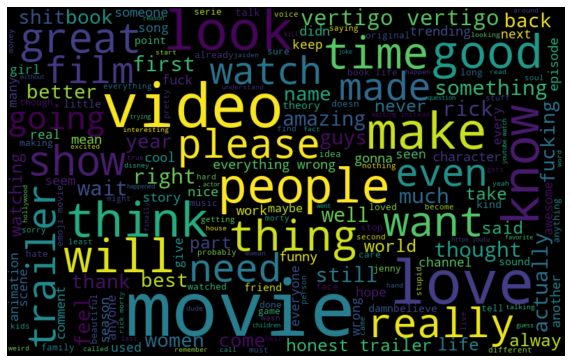

In [47]:
all_words = ' '.join([text for text in US_comments['comment_text']])
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Let's Construct a Wordcloud of Positive Comments

In [48]:
all_words_posi = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Positive']])

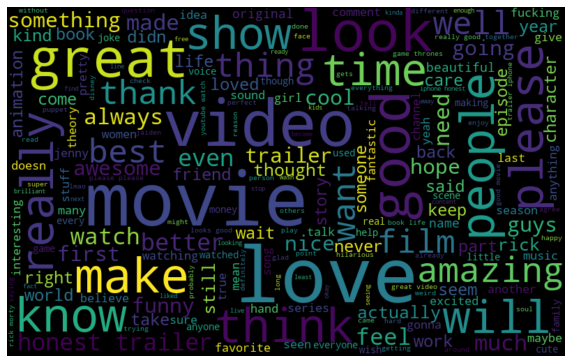

In [49]:
wordcloud_posi = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_posi)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_posi, interpolation="bilinear")
plt.axis('off')
plt.show()

## Let's Construct a Wordcloud of Negative Comments

In [50]:
all_words_nega = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Negative']])

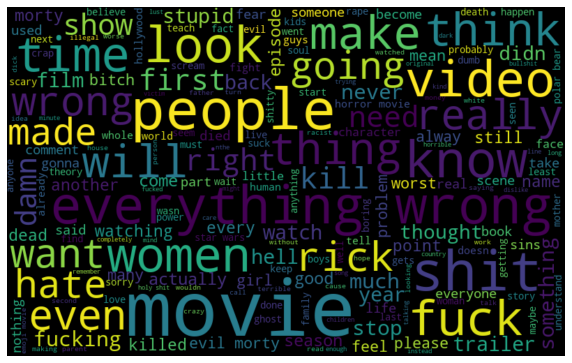

In [51]:
wordcloud_nega = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_nega)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_nega, interpolation="bilinear")
plt.axis('off')
plt.show()

## Let's Contsruct a Wordcloud of Neutral Comments.

In [52]:
all_words_neu = ' '.join([text for text in US_comments['comment_text'][US_comments.Sentiment == 'Neutral']])

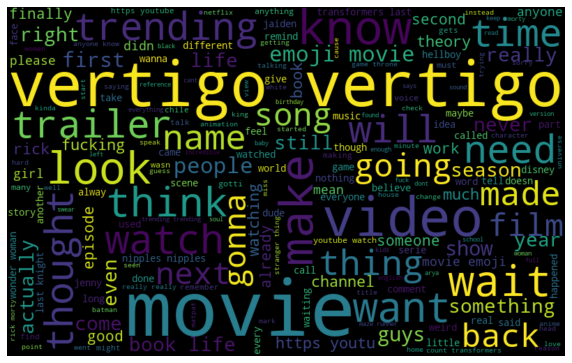

In [53]:
wordcloud_neu = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(all_words_neu)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud_neu, interpolation="bilinear")
plt.axis('off')
plt.show()

In [55]:
df =pd.read_csv('./Vader Output/sentiment_out.csv')
df = pd.DataFrame(df)
df['Sentiment'].value_counts()

Neutral     14007
Positive    12252
Negative     5259
Name: Sentiment, dtype: int64